Medical Appointment No Shows.  Medical appointments are time commitments doctors make with patients.  Let's build models that predict whether the next appointment is a show or no show! 
Expected Output:
Multiple accuracy measures resembling different criteria used for training your decision tree classifiers.
Multiple accuracy measures resembling a different number of estimators used for your random forest classifiers.
One printed confusion matrix for the best model.  Use KaggleV2-May-2016.csv for this project.


In [18]:
import pandas as pd
df = pd.read_csv("KaggleV2-May-2016.csv")
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Check for Null, then Drop PatientId colunn, as it provides us with no data. 
df = df.dropna()
df.drop('PatientId', axis=1, inplace=True)

# Encode the Gender, and Neighbourhood
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Neighbourhood'] = label_encoder.fit_transform(df['Neighbourhood'])

#df.head(6)
# Take a look at the final dbase
#sns.violinplot(data=df, x='Gender', y='Age')
#plt.show()

Step 3  Feature Extraction
Extract the following features:
Gender
Age
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
Note: you may see incorrect spelling. It is related to the dataset, for example:
Hipertension=Hypertension
Handcap=Handicap

In [19]:
features = ['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

X = df[features].copy()
y = df['No-show']

X.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,62,0,1,0,0,0,0
1,1,56,0,0,0,0,0,0
2,0,62,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0
4,0,56,0,1,1,0,0,0


Step 4. Preprocessing
Perform any needed pre-processing of the chosen features including:
Scaling
Encoding
Dealing with Nan values
Hint: use only the preprocessing steps you believe are useful.

In [20]:
# Scale Age using MinMaxScaler
scaler = MinMaxScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

# Check for any remaining NaNs (good practice)
print(X.isnull().sum())

X.head()

Gender          0
Age             0
Scholarship     0
Hipertension    0
Diabetes        0
Alcoholism      0
Handcap         0
SMS_received    0
dtype: int64


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,0.543103,0,1,0,0,0,0
1,1,0.491379,0,0,0,0,0,0
2,0,0.543103,0,0,0,0,0,0
3,0,0.077586,0,0,0,0,0,0
4,0,0.491379,0,1,1,0,0,0


Step 5. Splitting the Data
Split your data as follows:
80% training set
10% validation set
10% test set

In [21]:
# First split: 80% train, 20% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Split the 20% temp into 50% validation and 50% test (resulting in 10% each of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X):.2%})")
print(f"Validation set size: {X_val.shape[0]} ({X_val.shape[0]/len(X):.2%})")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X):.2%})")

Training set size: 88421 (80.00%)
Validation set size: 11053 (10.00%)
Test set size: 11053 (10.00%)


Step 6. Training Tree-based Classifiers
Use a decision-tree classifier model to train your data.
Choose the best criterion for the decision tree algorithm by trying different values and validating performance on the validation set.
Note: choosing the best criterion is an example of hyper-parameter tuning.
Classification Metrics
Print the accuracy score of your final classifier.
Print the confusion matrix.

In [22]:
criteria = ['gini', 'entropy', 'log_loss']
best_criterion = None
best_val_score = 0

for criterion in criteria:
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    val_pred = clf.predict(X_val)
    val_score = accuracy_score(y_val, val_pred)
    print(f"Criterion: {criterion}, Validation Accuracy: {val_score:.4f}")
    
    if val_score > best_val_score:
        best_val_score = val_score
        best_criterion = criterion

print(f"\nBest Criterion: {best_criterion}")

# Train final model with best criterion
final_clf = DecisionTreeClassifier(criterion=best_criterion, random_state=42)
final_clf.fit(X_train, y_train)

# Evaluate on Test Set
test_pred = final_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
conf_matrix = confusion_matrix(y_test, test_pred)

print(f"Final Test Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize Confusion Matrix
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.show()

Criterion: gini, Validation Accuracy: 0.7946
Criterion: entropy, Validation Accuracy: 0.7945
Criterion: log_loss, Validation Accuracy: 0.7945

Best Criterion: gini
Final Test Accuracy: 0.7996
Confusion Matrix:
[[8796   68]
 [2147   42]]


Step 7. Random Forest
Repeat step 6.
Increase/decrease the number of estimators in random forest and comment on the difference of the classification metrics.

n_estimators: 10, Validation Accuracy: 0.7932
n_estimators: 50, Validation Accuracy: 0.7946
n_estimators: 100, Validation Accuracy: 0.7942
n_estimators: 200, Validation Accuracy: 0.7942

Best n_estimators: 50
Final Random Forest Test Accuracy: 0.7998
Confusion Matrix:
[[8790   74]
 [2139   50]]


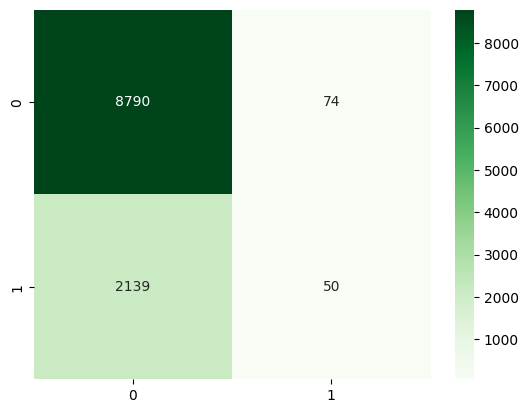

In [23]:
n_estimators_list = [10, 50, 100, 200]
best_n_estimators = None
best_val_score_rf = 0

for n in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    val_pred = clf.predict(X_val)
    val_score = accuracy_score(y_val, val_pred)
    print(f"n_estimators: {n}, Validation Accuracy: {val_score:.4f}")
    
    if val_score > best_val_score_rf:
        best_val_score_rf = val_score
        best_n_estimators = n

print(f"\nBest n_estimators: {best_n_estimators}")

# Train final model with best n_estimators
final_rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
final_rf.fit(X_train, y_train)

# Evaluate on Test Set
test_pred_rf = final_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, test_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, test_pred_rf)

print(f"Final Random Forest Test Accuracy: {test_accuracy_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.show()